In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import os
import sys
import time
import pandas as pd
import xarray as xr
import pickle

start = time.time()

cwd = os.getcwd()
dirLib = cwd + r'/../library'
if dirLib not in sys.path:
    sys.path.append(dirLib)

import fit_polynomial_utils as fit
import data_organize as dorg

# My simulated

In [14]:
# Only need to change this file location if using simulated data generated from "generate_sim_data.py"
load_sim_pkl_dir = r'C:\Users\Grant\OneDrive - UCB-O365\ARSENL\Experiments\Deadtime_Experiments\Data\Simulated\Select'
fname_sim_pkl_ref = r'C:\Users\Grant\OneDrive - UCB-O365\ARSENL\Experiments\Deadtime_Experiments\Data\Simulated\sim_amp1.0E+06_nshot1.0E+06.pkl'
infile_ref = open(fname_sim_pkl_ref, 'rb')
df = pickle.load(infile_ref)
infile_ref.close()

flight_time = xr.DataArray(df.flight_time.data)
true_flight_time = xr.DataArray(df.true_flight_time.data)
n_shots_ref = df.n_shots.data
t_det_lst_ref = df.t_det_lst.data
t_phot_lst_ref = df.t_phot_lst.data

target_amplitude_ref = df.target_amplitude.data
target_time_ref = df.target_time.data
laser_pulse_width_ref = df.laser_pulse_width.data
window_bnd_ref = df.window_bnd.data
background_ref = df.background.data

In [46]:
# print(flight_time[:10])

timetag = flight_time[:100] / 25e-12
print(timetag)

<xarray.DataArray (dim_0: 100)>
array([1253.06301519, 1273.70665628, 1257.46189416, 1255.80433042,
       1238.00833673, 1227.88184997, 1242.60352568, 1251.97787629,
       1144.20572112, 1214.62689532, 1229.77054735, 1295.77609796,
       1248.60349108, 1224.92537298, 1227.11642783, 1238.67857838,
       1248.55538045, 1252.50444512, 1266.10514339, 1262.53628866,
       1250.4076781 , 1247.5179586 , 1257.62654089, 1284.64817742,
       1261.58087628, 1269.29949579, 1238.32364662, 1274.19169574,
       1196.12865436, 1255.1460558 , 1223.51558198, 1229.18213404,
       1255.67762099, 1243.61086106, 1270.89234561, 1208.92392349,
       1268.96404874, 1253.85847548, 1262.78378371, 1217.10803869,
       1239.83459937, 1221.09403566, 1265.26220896, 1237.92601808,
       1281.02539937, 1245.76822599, 1239.67673965, 1259.54257065,
       1270.6777586 , 1227.58899655, 1329.0865348 , 1223.880623  ,
       1209.00343857, 1263.47103353, 1229.40177647, 1248.18387042,
       1213.49846437, 1254.858

# netcdf converted from .ARSENL

In [3]:
### PATH VARIABLES ###
load_dir = r'C:\Users\Grant\OneDrive - UCB-O365\ARSENL\Experiments\SPCM\SPCM_Data_2023.01.31\netcdf'  # Where the data is loaded from
fname = r'\OD50_Dev_0_-_2023-01-31_16.43.48_OD5.0.ARSENL.nc'  # The dataset that will serve as the high-fidelity reference when evaluating

In [4]:
ds = xr.open_dataset(load_dir + fname)

In [5]:
ds

<xarray.Dataset>
Dimensions:              (time_tag_index: 17729, sync_index: 1608890)
Coordinates:
  * sync_index           (sync_index) uint64 8003617 8003618 ... 9612505 9612506
Dimensions without coordinates: time_tag_index
Data variables:
    time_tag             (time_tag_index) int64 ...
    time_tag_diff        (time_tag_index) int64 ...
    time_tag_sync_index  (time_tag_index) uint64 ...
    sync_ux_time         (sync_index) datetime64[ns] ...
    sync_ux_time_us      (sync_index) timedelta64[ns] ...
    sync_diff_time       (sync_index) int64 ...
    sync_delta           (sync_index) int64 ...

In [39]:
tt = ds.time_tag
tt_sync_idx = ds.time_tag_sync_index
sync_idx = ds.sync_index

In [40]:
tt

<xarray.DataArray 'time_tag' (time_tag_index: 17729)>
array([1397877, 1786135,    1174, ..., 2370286,  236626,    1180], dtype=int64)
Dimensions without coordinates: time_tag_index
Attributes:
    description:       Photon relative time tag, with 25 ps per count
    units:             clock counts
    clock units:       ps
    device:            dev
    clock conversion:  25.0

In [8]:
tt_sync_idx

<xarray.DataArray 'time_tag_sync_index' (time_tag_index: 17729)>
array([8003747, 8003916, 8004007, ..., 9612224, 9612289, 9612357], dtype=uint64)
Dimensions without coordinates: time_tag_index
Attributes:
    description:  Sync counter value corresponding to the time tag
    units:        none
    device:       dev

In [9]:
sync_idx

<xarray.DataArray 'sync_index' (sync_index: 1608890)>
array([8003617, 8003618, 8003619, ..., 9612504, 9612505, 9612506], dtype=uint64)
Coordinates:
  * sync_index  (sync_index) uint64 8003617 8003618 8003619 ... 9612505 9612506
Attributes:
    description:  Sync counter
    units:        none
    device:       dev

In [11]:
Nshot = 20
n = np.arange(Nshot)

In [38]:
np.where(tt<=1e4)

(array([0], dtype=int64),)

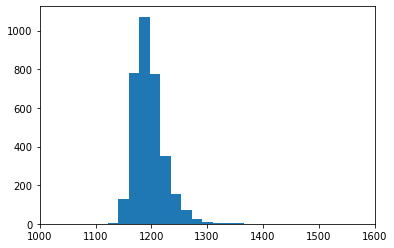

In [45]:
tt = tt[np.where(tt<=2000)]

plt.hist(tt[:], 100)
plt.xlim([1000, 1600])
plt.show()